# How to compute a functional map?

In [1]:
import numpy as np

from geomfum.dataset import NotebooksDataset
from geomfum.descriptor.pipeline import (
    ArangeSubsampler,
    DescriptorPipeline,
    L2InnerNormalizer,
)
from geomfum.descriptor.spectral import HeatKernelSignature, WaveKernelSignature

from geomfum.forward_functional_map import ForwardFunctionalMap
from geomfum.shape import TriangleMesh

[Load meshes](load_mesh_from_file.ipynb).

In [2]:
dataset = NotebooksDataset()

mesh_a = TriangleMesh.from_file(dataset.get_filename("cat-00"))
mesh_b = TriangleMesh.from_file(dataset.get_filename("lion-00"))

/home/ubuntu/giulio_vigano/geomfum_proj/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[Set Laplace eigenbasis](./mesh_laplacian_spectrum.ipynb) for each mesh.

In [3]:
mesh_a.laplacian.find_spectrum(spectrum_size=40, set_as_basis=True)
mesh_b.laplacian.find_spectrum(spectrum_size=40, set_as_basis=True)

mesh_a.basis.use_k = 30
mesh_b.basis.use_k = 30


Set a [descriptor pipeline](./descriptor_pipeline.ipynb) and apply it to both shapes.

In [4]:

mesh_a.landmark_indices =np.array( [2840, 1594,5596, 6809,3924,7169] )
mesh_b.landmark_indices =np.array( [1334,834,4136,4582,3666,4955])
steps = [
    HeatKernelSignature.from_registry(n_domain=100, use_landmarks=True),
    ArangeSubsampler(subsample_step=1),
    L2InnerNormalizer(),
]

pipeline = DescriptorPipeline(steps)

descr_a = pipeline.apply(mesh_a)
descr_b = pipeline.apply(mesh_b)

Solve for the functional map matrix performing the forward pass.

In [5]:
ffm = ForwardFunctionalMap(1000,1,bijective=True)
fmap,fmap21 = ffm(mesh_a, mesh_b, descr_a,descr_b)


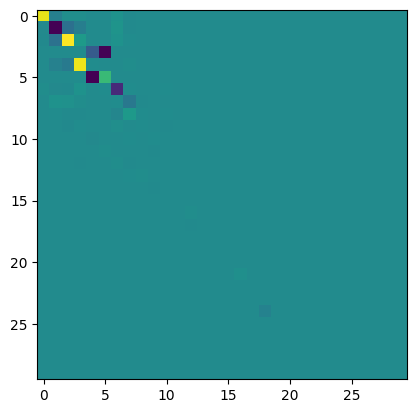

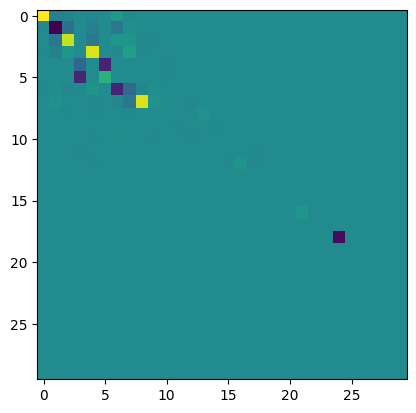

In [6]:
import matplotlib.pyplot as plt
plt.imshow(fmap)
plt.show()
plt.imshow(fmap21)

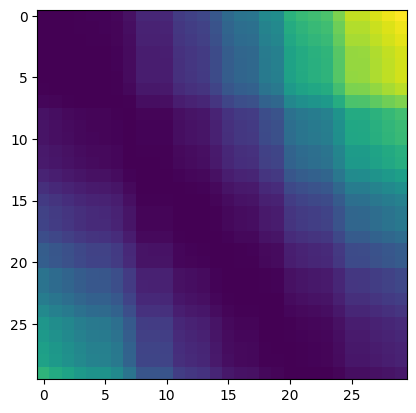

In [7]:
mask=ffm._compute_mask(mesh_a.basis.vals, mesh_b.basis.vals,1)

plt.imshow(mask)

## Further reading

* [How to compute a pointwise map from a functional map?](./pointwise_from_functional.ipynb)

* [How to refine a functional map?](./refine_functional_map.ipynb)

* [How to use ReMatching to compute a functional map?](./rematching.ipynb)